# NBA Position & Assists Prediction - by Luuk Wassenaar and Ryan Brim

Date: 16 November 2022

Dataset: NBA Players Stats

Data Source: https://www.kaggle.com/datasets/vivovinco/nba-player-stats


# ----------------------------------------------------------------------

### Project Description
Two of the big predictive modeling topics in data science are regression and classification, which is why we have used both in our research. Classification is used to predict an NBA player's position based on various basketball statistics and regression is used to predict the assists per game of an NBA player based on other basketball statistics.

### What is the importance of predicting NBA player positions and stats?

The prediction of NBA player positions and number of assists is important because it can help teams make informed decisions about player acquisitions, player development, and in-game strategy.

Predicting player positions can provide insights into a player's strengths and weaknesses, as well as their potential fit within a team's system. For example, if a team needs a point guard to run their offense, they can use data analytics to identify players with high assist rates and good ball-handling skills, who are likely to excel in that role.

Predicting the number of assists a player is likely to have can also be valuable in understanding a player's playmaking abilities and overall impact on the game. Assists are a key measure of a player's ability to create scoring opportunities for their teammates, and can be used to identify players who are effective at passing and facilitating the offense.

Overall, the ability to accurately predict player positions and number of assists can provide teams with a competitive edge in player evaluation, team building, and in-game strategy.

# ----------------------------------------------------------------------


### Importing Libraries

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, metrics, decomposition
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import completeness_score, homogeneity_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

# Research Question 1 (Classification)
# Can we predict a NBA player's positions based on basketball statistics?

### Data Cleaning

In [2]:
data = pd.read_csv("regular.txt", header=0, sep=";", index_col=0)
data.drop_duplicates(["Player"], keep=False, inplace=True)
data['Pos'] = pd.factorize(data['Pos'])[0]
data['Tm'] = pd.factorize(data['Tm'])[0]
positions = data["Pos"]
data.drop(['Player'], axis=1, inplace=True)
data

,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Rk,,,,,,,,,,,,,,,,,,,,,
1,0,22,0,73,28,23.6,3.6,8.3,0.439,0.8,...,0.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
2,0,28,1,76,75,26.3,2.8,5.1,0.547,0.0,...,0.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9
3,0,24,2,56,56,32.6,7.3,13.0,0.557,0.0,...,0.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1
4,1,21,1,32,0,11.3,1.7,4.1,0.402,0.2,...,0.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1
5,0,36,3,47,12,22.3,5.4,9.7,0.550,0.3,...,0.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,2,28,24,2,0,10.5,1.0,3.5,0.286,0.5,...,0.600,0.0,1.0,1.0,2.0,1.0,0.5,0.5,2.0,4.0
602,3,23,15,76,76,34.9,9.4,20.3,0.460,3.1,...,0.904,0.7,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4
603,0,23,2,56,12,12.6,2.3,4.4,0.526,0.0,...,0.623,1.5,3.7,5.3,0.9,0.3,0.4,0.7,1.5,5.3


In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 508 entries, 1 to 605
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pos     508 non-null    int64  
 1   Age     508 non-null    int64  
 2   Tm      508 non-null    int64  
 3   G       508 non-null    int64  
 4   GS      508 non-null    int64  
 5   MP      508 non-null    float64
 6   FG      508 non-null    float64
 7   FGA     508 non-null    float64
 8   FG%     508 non-null    float64
 9   3P      508 non-null    float64
 10  3PA     508 non-null    float64
 11  3P%     508 non-null    float64
 12  2P      508 non-null    float64
 13  2PA     508 non-null    float64
 14  2P%     508 non-null    float64
 15  eFG%    508 non-null    float64
 16  FT      508 non-null    float64
 17  FTA     508 non-null    float64
 18  FT%     508 non-null    float64
 19  ORB     508 non-null    float64
 20  DRB     508 non-null    float64
 21  TRB     508 non-null    float64
 22  AS

### Data Exploration

Different classes for the dependent variable broken down:

- 0 = C
- 1 = PF
- 2 = SG
- 3 = PG
- 4 = SF

In [3]:
data[["Age","G","GS","MP","FG","FGA","FG%","3P","3PA","3P%","2P","2PA","2P%","eFG%","FT", \
      "FTA","FT%","ORB","DRB","TRB","AST","STL","BLK","TOV","PF","PTS"]].describe()

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,...,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000
mean,25.533465,43.842520,21.775591,19.237598,3.139567,6.912598,0.432654,0.938386,2.746260,0.279697,...,0.669415,0.832283,2.676772,3.508268,1.899409,0.618898,0.378740,1.032087,1.615157,8.503937
std,4.152999,26.165661,26.623328,10.038971,2.372299,4.994984,0.148979,0.889941,2.337628,0.144335,...,0.267211,0.766033,1.889380,2.471672,1.855516,0.422490,0.390848,0.846721,0.810694,6.543897
min,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,18.000000,0.000000,10.900000,1.400000,3.275000,0.395750,0.200000,0.800000,0.235000,...,0.633500,0.300000,1.300000,1.800000,0.600000,0.300000,0.100000,0.500000,1.000000,3.700000
50%,25.000000,50.000000,8.000000,19.200000,2.700000,5.600000,0.444000,0.700000,2.200000,0.326000,...,0.750000,0.600000,2.500000,3.050000,1.300000,0.600000,0.300000,0.800000,1.600000,7.300000
75%,28.000000,67.000000,40.000000,27.750000,4.400000,9.550000,0.497250,1.400000,4.225000,0.368250,...,0.833000,1.100000,3.500000,4.600000,2.525000,0.900000,0.500000,1.300000,2.200000,11.525000
max,41.000000,82.000000,82.000000,43.500000,11.400000,21.800000,1.000000,4.500000,11.700000,1.000000,...,1.000000,4.600000,11.000000,14.700000,10.800000,2.300000,2.800000,4.500000,3.800000,30.600000


#### Offensive Stats

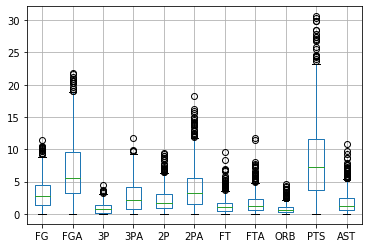

In [84]:
data[["FG", "FGA", "3P","3PA","2P", "2PA", "FT", "FTA","ORB","PTS", "AST"]].boxplot()

#### Defensive Stats

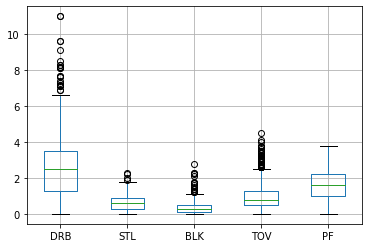

In [87]:
data[["DRB", "STL", "BLK","TOV","PF"]].boxplot()

#### Games Stats

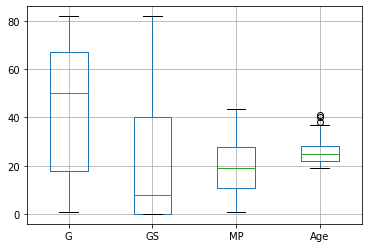

In [103]:
data[["G", "GS", "MP","Age"]].boxplot()

#### Count of positions in the dataset

[-1, 5, 0, 200]

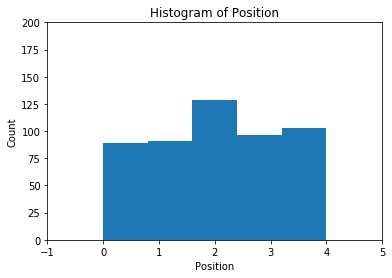

In [89]:
plt.hist(positions, bins=5, alpha=1)
plt.xlabel('Position')
plt.ylabel('Count')
plt.title('Histogram of Position')
plt.axis([-1, 5, 0, 200])

#### Average 3-Pointers Per Game For Each Position

Text(0.5, 1.0, 'Histogram of 3-Pointers Per Game By Position')

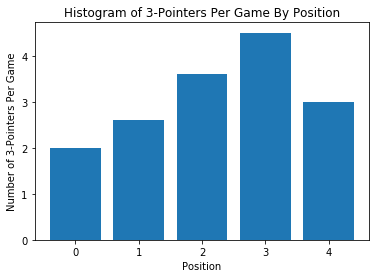

In [93]:
plt.bar(positions, data["3P"])
plt.xlabel('Position')
plt.ylabel('Number of 3-Pointers Per Game')
plt.title('Histogram of 3-Pointers Per Game By Position')

Centers (Pos=0) seem to be making the least 3-Pointers while Point Guards (Pos=3) make the most.

Text(0.5, 1.0, 'Histogram of Blocks Per Game By Position')

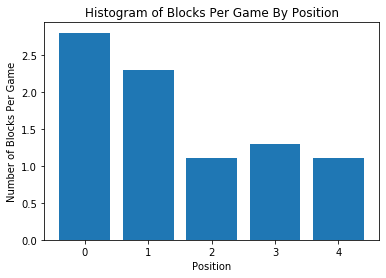

In [94]:
plt.bar(positions, data["BLK"])
plt.xlabel('Position')
plt.ylabel('Number of Blocks Per Game')
plt.title('Histogram of Blocks Per Game By Position')

Centers block the most (+-2.7). Closely followed by Point Forward (+-2.25). Other positions seem to be equal.

Text(0.5, 1.0, 'Histogram of Steals Per Game By Position')

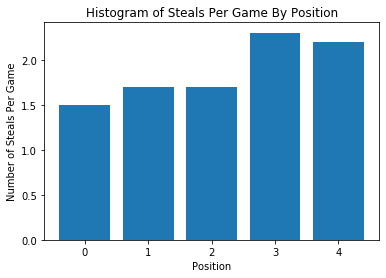

In [95]:
plt.bar(positions, data["STL"])
plt.xlabel('Position')
plt.ylabel('Number of Steals Per Game')
plt.title('Histogram of Steals Per Game By Position')

Point Guards (Pos=3) and Small Forwards (Pos=4) seem to be stealing the most balls per game. Others positions seem to be equal.

Text(0.5, 1.0, 'Histogram of Free Throws Made Per Game By Position')

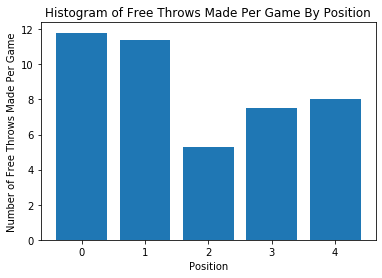

In [101]:
plt.bar(positions, data["FTA"])
plt.xlabel('Position')
plt.ylabel('Number of Free Throws Attempted Per Game')
plt.title('Histogram of Free Throws Attempted Per Game By Position')

Centers (Pos=0) attempt the most free throws

Text(0.5, 1.0, 'Histogram of Free Throws Made Per Game By Position')

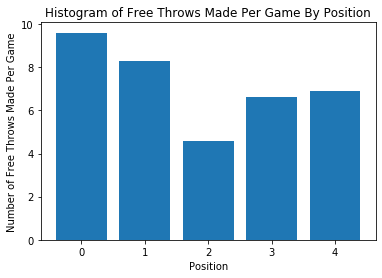

In [102]:
plt.bar(positions, data["FT"])
plt.xlabel('Position')
plt.ylabel('Number of Free Throws Made Per Game')
plt.title('Histogram of Free Throws Made Per Game By Position')

Even though, Point Guards (Pos=3) tend to be the better shooters, the Centers are the ones making the most free throws.

#### Checking for correlation between independent variables

In [13]:
corr_data = data.corr()
corr_data.style.background_gradient(cmap='coolwarm')

,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Pos,1.000000,-0.098597,0.042215,-0.064597,-0.057639,0.039693,-0.008009,0.089373,-0.249067,0.230106,0.265559,0.141876,-0.119102,-0.049615,-0.156760,-0.161318,-0.047193,-0.079663,0.018664,-0.435671,-0.251164,-0.327935,0.184402,0.115362,-0.407121,0.039151,-0.161143,0.016373
Age,-0.098597,1.000000,-0.068252,0.078660,0.110758,0.158111,0.112467,0.100795,0.079853,0.136830,0.119049,0.087471,0.076694,0.065892,0.082447,0.105161,0.090949,0.076159,0.073159,0.016895,0.140514,0.113668,0.148598,0.097662,0.036407,0.087448,0.119447,0.118309
Tm,0.042215,-0.068252,1.000000,0.001979,-0.004331,0.011170,-0.021782,-0.004010,0.001349,0.026705,0.048535,0.058712,-0.040559,-0.038024,0.024391,0.015519,-0.010637,-0.013953,0.067850,-0.029658,0.008933,-0.002698,0.026531,-0.028938,0.005400,0.038911,0.044863,-0.014357
G,-0.064597,0.078660,0.001979,1.000000,0.661376,0.668377,0.576309,0.546991,0.356234,0.500025,0.467087,0.472525,0.488618,0.473911,0.304171,0.430229,0.439944,0.446285,0.537476,0.348073,0.545993,0.526968,0.415874,0.461057,0.329200,0.435880,0.546508,0.576455
GS,-0.057639,0.110758,-0.004331,0.661376,1.000000,0.785219,0.751999,0.722201,0.243559,0.532462,0.518416,0.273475,0.693020,0.692279,0.175642,0.263837,0.635663,0.642841,0.322861,0.409150,0.688210,0.653686,0.587397,0.553248,0.411829,0.646340,0.598644,0.747821
MP,0.039693,0.158111,0.011170,0.668377,0.785219,1.000000,0.883628,0.893127,0.291883,0.703962,0.717793,0.452883,0.777456,0.804638,0.236376,0.356468,0.705139,0.697960,0.541691,0.389445,0.761933,0.703683,0.722591,0.706146,0.439781,0.771019,0.752031,0.880360
FG,-0.008009,0.112467,-0.021782,0.576309,0.751999,0.883628,1.000000,0.972854,0.333187,0.675627,0.679437,0.396388,0.937102,0.945781,0.252632,0.357178,0.858525,0.848864,0.469023,0.374256,0.767330,0.702291,0.736586,0.615721,0.417698,0.835169,0.640177,0.992232
FGA,0.089373,0.100795,-0.004010,0.546991,0.722201,0.893127,0.972854,1.000000,0.197797,0.761080,0.789813,0.414574,0.862688,0.910320,0.146990,0.250158,0.830513,0.809476,0.475166,0.252009,0.699107,0.612224,0.769788,0.637026,0.315745,0.848439,0.609188,0.978678
FG%,-0.249067,0.079853,0.001349,0.356234,0.243559,0.291883,0.333187,0.197797,1.000000,0.033734,-0.024139,0.214312,0.402913,0.301861,0.862623,0.958308,0.235638,0.256142,0.324080,0.433393,0.365034,0.413694,0.104360,0.141663,0.413325,0.177194,0.352040,0.293929
3P,0.230106,0.136830,0.026705,0.500025,0.532462,0.703962,0.675627,0.761080,0.033734,1.000000,0.974420,0.570772,0.376398,0.440985,0.053095,0.222678,0.477206,0.427076,0.455031,-0.105544,0.363047,0.245027,0.551668,0.495843,0.033822,0.545451,0.364269,0.723599


Lots of multicollinearity in the data which needs to be taken care of before building a model.

### Unsupervised Learning

In [14]:
def plot_silhouettes(data, clusters, metric='euclidean'):
    
    from matplotlib import cm
    from sklearn.metrics import silhouette_samples

    cluster_labels = np.unique(clusters)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = metrics.silhouette_samples(data, clusters, metric='euclidean')
    c_ax_lower, c_ax_upper = 0, 0
    cticks = []
    for i, k in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[clusters == k]
        c_silhouette_vals.sort()
        c_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        plt.barh(range(c_ax_lower, c_ax_upper), c_silhouette_vals, height=1.0, 
                      edgecolor='none', color=color)

        cticks.append((c_ax_lower + c_ax_upper) / 2)
        c_ax_lower += len(c_silhouette_vals)
    
    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg, color="red", linestyle="--") 

    plt.yticks(cticks, cluster_labels)
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')

    plt.tight_layout()
    #pl.savefig('images/11_04.png', dpi=300)
    plt.show()
    
    return

In [18]:
pca = decomposition.PCA()
data_trans = pca.fit(data_norm).transform(data_norm)
np.set_printoptions(precision=2,suppress=True, edgeitems=10, linewidth=200)
print("Transformed Feature Space of PCs:\n", data_trans, "\n", sep='')
print("Variance Explained:\n", pca.explained_variance_ratio_, sep='') # 6 features

Transformed Feature Space of PCs:
[[ 0.33  0.62  0.27 -0.36 -0.22  0.06 -0.19 -0.16 -0.11  0.15 ...  0.01  0.04  0.03 -0.04  0.01  0.   -0.01 -0.   -0.   -0.  ]
 [ 0.59  0.99  0.37 -0.23 -0.23  0.62 -0.06  0.23  0.06 -0.06 ...  0.16 -0.02  0.03 -0.02  0.02 -0.01 -0.   -0.    0.   -0.  ]
 [ 1.25  0.81  0.68  0.11  0.29  0.13 -0.3   0.03  0.11 -0.14 ...  0.    0.06 -0.05 -0.01  0.02 -0.04 -0.    0.    0.   -0.  ]
 [-0.55  0.32  0.27 -0.31  0.05 -0.09 -0.16 -0.2  -0.03 -0.01 ...  0.01 -0.02  0.03  0.01  0.01  0.01 -0.    0.    0.    0.  ]
 [ 0.33  0.67  0.26 -0.26  0.2  -0.35  0.05  0.23  0.31  0.26 ... -0.05  0.03 -0.01 -0.   -0.01 -0.01 -0.   -0.    0.    0.  ]
 [ 0.46 -0.13 -0.02 -0.51 -0.35 -0.01  0.18 -0.11 -0.1  -0.02 ...  0.02  0.   -0.02  0.   -0.   -0.   -0.   -0.    0.   -0.  ]
 [ 0.94  0.97  0.4   0.01  0.31  0.28 -0.12 -0.13  0.07  0.13 ...  0.08  0.08 -0.08  0.05  0.01 -0.01 -0.    0.01 -0.    0.  ]
 [-0.22 -0.22  0.05 -0.35  0.12  0.09 -0.16  0.02 -0.05 -0.21 ... -0.01 -0.05

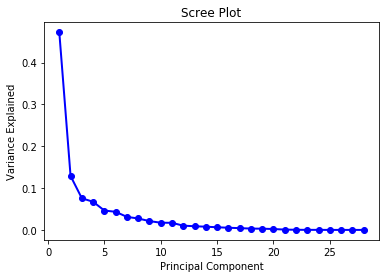

In [19]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [115]:
# data.drop(['Pos'], axis=1, inplace=True)

min_max_scaler = preprocessing.MinMaxScaler().fit(data)
data_norm = min_max_scaler.transform(data)
data_norm = pd.DataFrame(data_norm)

X_train, X_test, y_train, y_test = train_test_split(data_norm, positions, test_size=0.2, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
pca = PCA(n_components=10)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

Silhouettes Mean: 0.2516138946198007


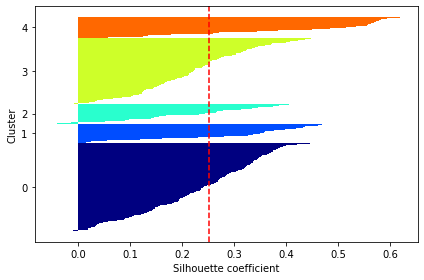

Completeness Score:  0.11057102475431463
Homogeneity Score:  0.09625223044202373


In [116]:
n_clust = 5
kmeans = KMeans(n_clusters=n_clust)
kmeans.fit(X_train)
clusters = kmeans.predict(X_train)

silhouettes = metrics.silhouette_samples(X_train, clusters)
print("Silhouettes Mean:",silhouettes.mean())
plot_silhouettes(X_train, clusters)

num_classes = np.array(y_train)
print("Completeness Score: ", completeness_score(num_classes, clusters))
print("Homogeneity Score: ", homogeneity_score(num_classes, clusters))

### Ensemble

In [20]:
rf = RandomForestClassifier(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [77]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
pprint(random_grid)


{'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [22]:
from sklearn.model_selection import RandomizedSearchCV

In [78]:
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, \
                               n_iter = 100, cv = 10, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)
rf_random.best_params_

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   29.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 12.9min finished


{'n_estimators': 1600,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 40}

In [117]:
#1
classifier = RandomForestClassifier(max_depth=20, n_estimators=1800, min_samples_split=10, min_samples_leaf=4, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy', accuracy_score(y_test, y_pred))


[[13  1  0  0  0]
 [ 8  7  2  0  1]
 [ 0  1 20  5  1]
 [ 0  1  8 12  3]
 [ 0  0  0  0 19]]
Accuracy 0.696078431372549


In [118]:
#2
classifier = RandomForestClassifier(max_depth=50, n_estimators=500, min_samples_split=10, min_samples_leaf=1, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy', accuracy_score(y_test, y_pred))

[[13  1  0  0  0]
 [ 8  7  2  0  1]
 [ 0  1 20  5  1]
 [ 0  1  9 11  3]
 [ 0  0  0  0 19]]
Accuracy 0.6862745098039216


In [119]:
#3
classifier = RandomForestClassifier(max_depth=40, n_estimators=1600, min_samples_split=10, min_samples_leaf=1, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy', accuracy_score(y_test, y_pred))

[[13  1  0  0  0]
 [ 8  7  2  0  1]
 [ 0  1 20  5  1]
 [ 0  1  9 11  3]
 [ 0  0  0  0 19]]
Accuracy 0.6862745098039216


In [28]:
classifier.feature_importances_

array([0.12, 0.36, 0.14, 0.12, 0.13, 0.14])

### AdaBoost

In [33]:
from sklearn import metrics

def measure_performance(X, y, clf, show_accuracy=True, show_classification_report=True, show_confussion_matrix=True):
    y_pred = clf.predict(X)   
    if show_accuracy:
         print("Accuracy:{0:.3f}".format(metrics.accuracy_score(y, y_pred)),"\n")
    if show_classification_report:
        print("Classification report")
        print(metrics.classification_report(y, y_pred),"\n")
      
    if show_confussion_matrix:
        print("Confussion matrix")
        print(metrics.confusion_matrix(y, y_pred),"\n")

In [36]:
ab = AdaBoostClassifier(random_state=42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(ab.get_params())

Parameters currently in use:

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': 42}


In [34]:
ab = AdaBoostClassifier()
ab = ab.fit(X_train, y_train)

In [35]:
measure_performance(X_test, y_test, ab, show_confussion_matrix=True, show_classification_report=False)

Accuracy:0.422 

Confussion matrix
[[11  3  0  0  0]
 [ 4  8  5  0  1]
 [ 0  4  8  9  6]
 [ 0  2  4 11  7]
 [ 0  3  6  5  5]] 



In [73]:
learning_rate = [0,0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6,1.8,2.0]
# Maximum number of levels in tree
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate
              }
pprint(random_grid)

{'learning_rate': [0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [72]:
# search across 100 different combinations, and use all available cores
ab_random = RandomizedSearchCV(estimator = ab, param_distributions = random_grid, \
                               n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
ab_random.fit(X_train, y_train)
ab_random.best_params_

Fitting 3 folds for each of 24 candidates, totalling 72 fits


/Users/luukwassenaar/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 24 is smaller than n_iter=100. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


ValueError: Invalid parameter weights for estimator AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=42). Check the list of available parameters with `estimator.get_params().keys()`.

In [74]:
# search across 100 different combinations, and use all available cores
ab_random = RandomizedSearchCV(estimator = ab, param_distributions = random_grid, \
                               n_iter = 100, cv = 10, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
ab_random.fit(X_train, y_train)
ab_random.best_params_

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   28.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 13.6min finished


{'n_estimators': 1600, 'learning_rate': 1.4}

In [120]:
ab_classifier = AdaBoostClassifier(n_estimators=1000, learning_rate=0.6, random_state=0)
ab_classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = ab_classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy', accuracy_score(y_test, y_pred))

[[ 6  8  0  0  0]
 [ 4  9  5  0  0]
 [ 2  0 16  9  0]
 [ 0  0  8 16  0]
 [ 0  0 11  1  7]]
Accuracy 0.5294117647058824


In [121]:
ab_classifier = AdaBoostClassifier(n_estimators=1600, learning_rate=1.4, random_state=0)
ab_classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = ab_classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy', accuracy_score(y_test, y_pred))

[[ 8  6  0  0  0]
 [ 2  9  7  0  0]
 [ 0  0 25  2  0]
 [ 0  0 11 13  0]
 [ 0  0  5  4 10]]
Accuracy 0.6372549019607843


### KNN

In [122]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy', accuracy_score(y_test, y_pred))

[[12  2  0  0  0]
 [ 8  7  3  0  0]
 [ 0  4 16  5  2]
 [ 0  0 10  8  6]
 [ 0  0  6  2 11]]
Accuracy 0.5294117647058824


In [61]:
neigh = KNeighborsClassifier()
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(neigh.get_params())

Parameters currently in use:

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}


In [66]:
weights = ['distance', 'uniform']
n_neighbors = [1,2,3,4,5,6,7,8,9,10,20,30]



random_grid = {'n_neighbors': n_neighbors,
               'weights': weights
              }
pprint(random_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30],
 'weights': ['distance', 'uniform']}


In [69]:
# search across 100 different combinations, and use all available cores
knn_random = RandomizedSearchCV(estimator = neigh, param_distributions = random_grid, \
                               n_iter = 100, cv = 10, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
knn_random.fit(X_train, y_train)
knn_random.best_params_

/Users/luukwassenaar/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 24 is smaller than n_iter=100. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    0.4s finished


{'weights': 'distance', 'n_neighbors': 20}

In [123]:
neigh = KNeighborsClassifier(n_neighbors=20, weights='distance')
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy', accuracy_score(y_test, y_pred))

[[ 9  5  0  0  0]
 [ 5  9  4  0  0]
 [ 0  1 23  2  1]
 [ 0  0  9 10  5]
 [ 0  0  5  1 13]]
Accuracy 0.6274509803921569


# Research Question 2 (Regression)
# How well can we predict the assists per game of an NBA player based on other basketball statistics?

In [459]:
data = pd.read_csv("regular.txt", header=0, sep=";", index_col=0)
data.drop_duplicates(["Player"], keep=False, inplace=True)
data['Pos'] = pd.factorize(data['Pos'])[0]
data['Tm'] = pd.factorize(data['Tm'])[0]
positions = data["Pos"]
data.drop(['Player'], axis=1, inplace=True)
data

,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Rk,,,,,,,,,,,,,,,,,,,,,
1,0,22,0,73,28,23.6,3.6,8.3,0.439,0.8,...,0.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
2,0,28,1,76,75,26.3,2.8,5.1,0.547,0.0,...,0.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9
3,0,24,2,56,56,32.6,7.3,13.0,0.557,0.0,...,0.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1
4,1,21,1,32,0,11.3,1.7,4.1,0.402,0.2,...,0.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1
5,0,36,3,47,12,22.3,5.4,9.7,0.550,0.3,...,0.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,2,28,24,2,0,10.5,1.0,3.5,0.286,0.5,...,0.600,0.0,1.0,1.0,2.0,1.0,0.5,0.5,2.0,4.0
602,3,23,15,76,76,34.9,9.4,20.3,0.460,3.1,...,0.904,0.7,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4
603,0,23,2,56,12,12.6,2.3,4.4,0.526,0.0,...,0.623,1.5,3.7,5.3,0.9,0.3,0.4,0.7,1.5,5.3


In [481]:
assists = data["AST"]

In [482]:
data.drop(['AST'], axis=1, inplace=True)

In [483]:
data

,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,...,FT,FTA,FT%,ORB,DRB,TRB,STL,TOV,PF,PTS
Rk,,,,,,,,,,,,,,,,,,,,,
1,0,22,0,73,28,23.6,3.6,8.3,0.439,0.8,...,1.1,1.8,0.595,2.0,4.5,6.5,0.5,1.2,2.1,9.1
2,0,28,1,76,75,26.3,2.8,5.1,0.547,0.0,...,1.4,2.6,0.543,4.6,5.4,10.0,0.9,1.5,2.0,6.9
3,0,24,2,56,56,32.6,7.3,13.0,0.557,0.0,...,4.6,6.1,0.753,2.4,7.6,10.1,1.4,2.6,3.1,19.1
4,1,21,1,32,0,11.3,1.7,4.1,0.402,0.2,...,0.6,1.0,0.625,1.0,1.7,2.7,0.2,0.5,1.1,4.1
5,0,36,3,47,12,22.3,5.4,9.7,0.550,0.3,...,1.9,2.2,0.873,1.6,3.9,5.5,0.3,0.9,1.7,12.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,2,28,24,2,0,10.5,1.0,3.5,0.286,0.5,...,1.5,2.5,0.600,0.0,1.0,1.0,1.0,0.5,2.0,4.0
602,3,23,15,76,76,34.9,9.4,20.3,0.460,3.1,...,6.6,7.3,0.904,0.7,3.1,3.7,0.9,4.0,1.7,28.4
603,0,23,2,56,12,12.6,2.3,4.4,0.526,0.0,...,0.7,1.1,0.623,1.5,3.7,5.3,0.3,0.7,1.5,5.3


In [484]:
assists

Rk
1      1.1
2      3.4
3      3.4
4      0.7
5      0.9
      ... 
600    2.0
602    9.7
603    0.9
604    0.8
605    1.6
Name: AST, Length: 508, dtype: float64

In [485]:
X = data
y = assists

#### Splitting Data into Train and Test

In [486]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=111)

### Linear Regression

In [487]:
from sklearn.linear_model import LinearRegression

In [488]:
# Create linear regression object - here we'll use the default parameters
linreg = LinearRegression()

# Train the model using the training set
linreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [489]:
# Let's see predictions for the first 10 instances of the test data and compare to actual MEDV values

pred = linreg.predict(X_test)

In [490]:
# First, let's compute errors on all training instances

p_train = linreg.predict(X_train) # p_train is the array of predicted values

# Now we can constuct an array of errors
err_train = abs(p_train - y_train)

In [491]:
# Dot product of error vector with itself gives us the sum of squared errors
sum_sq_err = np.dot(err_train,err_train)

# Finally compute RMSE
rmse_train = np.sqrt(sum_sq_err/len(p_train))
print("RMSE on Training Data: ", rmse_train)

RMSE on Training Data:  0.7100923132978652


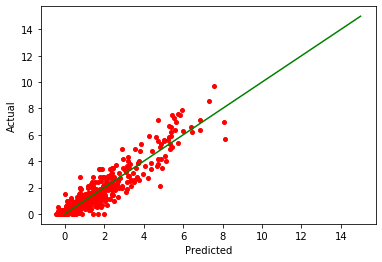

In [502]:
# Plot predicted against actual (in the training data)
%matplotlib inline
plt.plot(p_train, y_train,'ro', markersize=4)
plt.plot([0,15],[0,15], 'g-')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [493]:
# Similarly we can compute RMSE on the test data

p_test = linreg.predict(X_test) # array of predicted values

# Now we can constuct an array of errors
err_test = abs(p_test - y_test)

# Dot product of error vector with itself gives us the sum of squared errors
sum_sq_err = np.dot(err_test,err_test)

# Finally compute RMSE
rmse_test = np.sqrt(sum_sq_err/len(p_test))
print("RMSE on Test Data: ", rmse_test)

RMSE on Test Data:  0.9887941300609215


In [494]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse_test = np.sqrt(mean_squared_error(p_test, y_test))
print("RMSE on Test Data: ", rmse_test)

mae_test = mean_absolute_error(p_test, y_test)
print("MAE on Test Data: ", mae_test)

RMSE on Test Data:  0.9887941300609215
MAE on Test Data:  0.6393940949327827


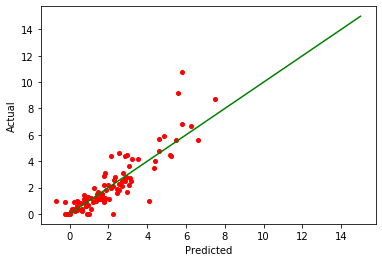

In [503]:
# Plot predicted against actual (in the test data)
%matplotlib inline
plt.plot(p_test, y_test,'ro', markersize=4)
plt.plot([0,15],[0,15], 'g-')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [496]:
from sklearn.model_selection import cross_val_score

In [497]:
cv_scores = cross_val_score(linreg, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
print(np.sqrt(abs(cv_scores)))

[0.81 1.1  0.67 0.77 0.74 0.68 0.7  0.8  0.8  0.72]


In [498]:
method_name = 'Simple Linear Regression'
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmse_train)


Method: Simple Linear Regression
RMSE on training: 0.7101


In [499]:
from sklearn.metrics import r2_score

In [500]:
r2 = r2_score(y_test, p_test)

In [501]:
r2

0.7752318922450264

### Ridge Regression

In [519]:
from sklearn.linear_model import Ridge

# Create linear regression object with a ridge coefficient 0.5
ridge = Ridge(alpha=1)

# Train the model using the training set
ridge.fit(X_train, y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [520]:
p_train = ridge.predict(X_train) # p_train is the array of predicted training values
rmse_train = np.sqrt(mean_squared_error(p_train, y_train))

# Compute RMSE on the set-aside test data

p_test = ridge.predict(X_test) # predictions on the test instances
rmse_test = np.sqrt(mean_squared_error(p_test, y_test))

method_name = 'Ridge Regression'
print("\n")
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on test data: %.4f' %rmse_test)



Method: Ridge Regression
RMSE on training: 0.7109
RMSE on test data: 0.9861


In [521]:
r2 = r2_score(y_test, p_test)
r2

0.7764567968281519

### Lasso Regression

In [527]:
from sklearn.linear_model import Lasso

In [551]:
lasso = Lasso(alpha=0.0001)

# Train the model using the training set
lasso.fit(X_train, y_train)

p_train = lasso.predict(X_train) # p_train is the array of predicted training values
rmse_train = np.sqrt(mean_squared_error(p_train, y_train))

# Compute RMSE on the set-aside test data

p_test = lasso.predict(X_test) # predictions on the test instances
rmse_test = np.sqrt(mean_squared_error(p_test, y_test))

method_name = 'Lasso Regression'
print("\n")
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on test data: %.4f' %rmse_test)



Method: Lasso Regression
RMSE on training: 0.7108
RMSE on test data: 0.9872


/Users/luukwassenaar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78.33850052936384, tolerance: 0.12951881773399015
  positive)


In [552]:
r2 = r2_score(y_test, p_test)
r2

0.7759733222652515

### Gradient Descent Regressor

In [522]:
from sklearn.linear_model import SGDRegressor

In [523]:
# SGD is very senstitive to varying-sized feature values. So, first we need to do feature scaling.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

sgdreg = SGDRegressor(penalty='l2', alpha=0.001, eta0=0.005, max_iter=5000)

# Compute RMSE on training data
sgdreg.fit(X_train_s,y_train)
p_train = sgdreg.predict(X_train_s)
rmse_train = np.sqrt(mean_squared_error(p_train, y_train))

In [524]:
# Compute RMSE on the set-aside test data

p_test = sgdreg.predict(X_test_s) # predictions on the test instances
rmse_test = np.sqrt(mean_squared_error(p_test, y_test))

method_name = 'Stochastic Gradient Descent Regression'
print("\n")
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on test data: %.4f' %rmse_test)



Method: Stochastic Gradient Descent Regression
RMSE on training: 0.7366
RMSE on test data: 0.9504


In [525]:
r2 = r2_score(y_test, p_test)
r2

0.7923367367908597